<h3><font color=red>Ship Routes </font> </h3>

In [5]:
system("jupyter" "notebook" "list")

['Currently running servers:',
 '....']

In [6]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
import ipyleaflet as ipy 
import folium
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point,Polygon
from geopandas import GeoDataFrame
from ipyleaflet import (
    Map, basemaps, basemap_to_tiles,
    WMSLayer, LayersControl,CircleMarker,Icon,Marker,MarkerCluster
)

from shapely.geometry import Point,Polygon
from geopandas import GeoDataFrame
%matplotlib inline
df = pd.read_csv("verisetimiz.csv")
df=df.head(7) 
df.head(7)
latlons=df



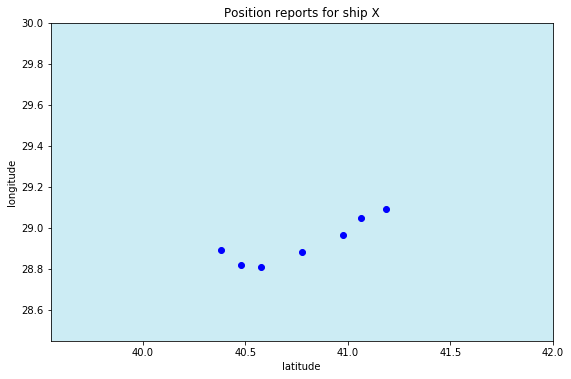

In [7]:
plt.figure(figsize=(9,6))
sea_img=mpimg.imread('sea.png')
plt.imshow(sea_img, extent=[39.55, 42, 28.45, 30], alpha=0.5)
plt.scatter(df['map_latitude'], df['map_longitude'], color='blue')
plt.title("Position reports for ship X")
plt.ylabel("longitude")
plt.xlabel("latitude")
plt.show()

Yukarıdaki şekilde bir gemiye ait 25 günlük konum bilgileri yer almaktadır.
Gemi Tekirdağ limanından hareket ederek Varna'ya doğru hareket etmiştir.

In [22]:
latlons.head()
map = folium.Map(location=[40.0, 31.0], zoom_start=5 , tiles='https://tile.openstreetmap.org/{z}/{x}/{y}.png',attr='Test')

for lat, lon in zip(latlons['map_latitude'],latlons['map_longitude']):
    
    folium.CircleMarker([lat, lon], popup='<b>'+str(lat)+','+str(lon)+'</b>', radius=3 , color='red',
                    fill_color='blue', fill_opacity=0.6, opacity=0.8).add_to(map)
map

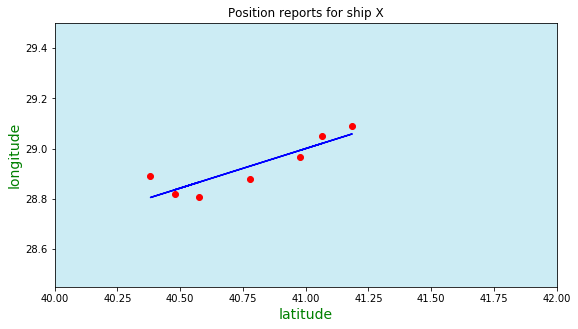

In [9]:
X = df.iloc[:,2:3].values
y = df.iloc[:, 3].values
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
plt.figure(figsize=(9,6))
sea_img=mpimg.imread('sea.png')
plt.imshow(sea_img, extent=[40, 42, 28.45, 29.5], alpha=0.5)

plt.scatter(df['map_latitude'], df['map_longitude'], color='red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title("Position reports for ship X")
plt.ylabel("longitude", fontsize=14,color='green')
plt.xlabel("latitude", fontsize=14,color='green')

plt.show()

In [10]:
y_head = lin_reg.predict(X)
from sklearn.metrics import r2_score
print("R Square Values :",r2_score(y,y_head)) 

R Square Values : 0.7823368656531859


We apply  LinearRegression to our data.And next we will be applying poligonal regression. 


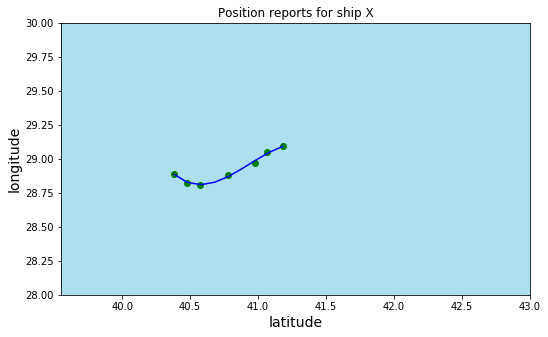

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.figure(figsize=(10,5))
plt.imshow(sea_img, extent=[39.55, 43, 28.0, 30], alpha=0.8)
plt.scatter(X, y, color = 'green')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title("Position reports for ship X")
plt.ylabel("longitude", fontsize=14)
plt.xlabel("latitude", fontsize=14)
plt.show()


This is a simple demonstration for understanding the regressions. To clarify ,we have eliminated some of the abnormal data to make our model better.As an example at some points, ships velocity is 0,  means no movement so data can be eliminated for better results.Now we can go on with the predictions. We want to give  42.5 as latitude value and let our model finds the longitude value.
 




<b>Predictions</b> 


In [12]:
# Polynomial Regression
y_head = lin_reg_2.predict(X_poly)
from sklearn.metrics import r2_score
print("R Square Values :",r2_score(y,y_head))


R Square Values : 0.9889621770530541


For the zone Marmara it will be better to use the Cluster analysis or clustering. As you know it is an unsupervised machine learning task.With clustering we  interpret the input data and find natural clusters in the data.
<img src='marmara_cluster.png'></img>
K-Means Algoritm



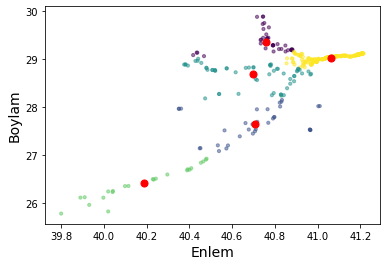

In [13]:
from sklearn.cluster import KMeans
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
df4 = pd.read_csv("verisetimiz.csv")
df5 = DataFrame(df4,columns=['map_latitude','map_longitude'])
kmeans = KMeans(n_clusters=5).fit(df5)
centroids = kmeans.cluster_centers_
#print(centroids) 
plt.scatter(df4['map_latitude'], df4['map_longitude'], c= kmeans.labels_.astype(float), s=10, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.ylabel("Boylam", fontsize=14)
plt.xlabel("Enlem", fontsize=14)
plt.show()





[41.06051389 29.03464889] near Beşiktaş<br>
[40.18932692 26.41505   ] near Ecabbat <br>
[40.70830882 27.65031471] near Marmara Island civarı<br>
[40.7597439  29.36005122] near Gebze<br>
[40.70161167 28.68303333] near Imralı<br>

In [14]:

pred = kmeans.predict([[40.60,28.60]]) 
print( centroids[pred]) #Imralı Civarı


[[40.69725424 28.68320847]]


In [15]:
# Fitting K-Means to the dataset
X = DataFrame(df4,columns=['map_latitude','map_longitude'])
y_kmeans2 = kmeans.fit_predict(X)
dizi = []
for i in range(0, y_kmeans2.size):    
    dizi.append(y_kmeans2[i])
    
import collections
counter=collections.Counter(dizi)
#print(counter)

for i in range(0, 5):   
    print("% " +str(counter[i]*100/y_kmeans2.size))


% 16.470588235294116
% 8.529411764705882
% 12.058823529411764
% 7.9411764705882355
% 55.0


Red spots shoving the cluster points.From bottom to top according to the orders of the points
Tekirdağ,Zeytinburnu, Gebze,Gemlik,Bandırma positions are located 

And when we try to represent these points by percentages

<ol>
Accoriding to denstity göre 40.94 - 28.7   Port Zeytinburnu <br>
Yoğunluğa göre 40.9 - 29.4   Port Gebze (Eskihisar)<br>
Yoğunluğa göre 40.5 - 29.2   Port Gemlik <br>
Yoğunluğa göre  40.4-28.00  Port Bandırma <br>
Yoğunluğa göre 40.94 - 27.59  Port Tekirdağ <br>
</ol>
<img src='rotalar.png'></img>

For measuring the distance between two points it would be better to use the haversine metdod. It will give more realistic results. 



In [16]:
import numpy as np
R = 6371
def pol2cart(lat, long):
    lat, long = np.radians(lat), np.radians(long)
    return R*np.cos(lat) *np.cos(long),\
           R*np.cos(lat) *np.sin(long),\
           R*np.sin(lat)

def haversine_dist(point1, point2):
  point1_cart = np.array(pol2cart(*point1))
  point2_cart = np.array(pol2cart(*point2))
  euc_dist = np.linalg.norm(point1_cart-point2_cart)
  sin_theta_2 = euc_dist / (R * 2)
  theta_2 = np.arcsin(sin_theta_2)
  theta = 2*theta_2
  dist = R*theta
  return dist, theta

tekirdag = (40.98, 27.52)
bandirma = (40.36, 27.97)
print(haversine_dist(tekirdag, bandirma))
##78.696 km

(78.69674116235167, 0.012352337335167426)


In [17]:

#df5 = DataFrame(df4,columns=['map_latitude','map_longitude'])
#kmeans = KMeans(n_clusters=5).fit(df5)
print(df5.shape) 
## 2289

# Fitting K-Means to the dataset
X = DataFrame(df4,columns=['map_latitude','map_longitude'])
##kmeans2 = KMeans(n_clusters=5).fit(X)
y_kmeans2 = kmeans.fit_predict(X)
print(y_kmeans2)
##print(y_kmeans2.size)

dizi = []
for i in range(0, y_kmeans2.size):    
    dizi.append(y_kmeans2[i])
    
import collections
counter=collections.Counter(dizi)
print(counter)

#for i in range(0, 5):   
 #   print("% " +str(counter[i]*100/y_kmeans2.size))







(340, 2)
[3 0 0 0 0 3 3 3 4 4 3 3 4 4 3 4 3 3 3 1 3 1 0 3 2 0 1 3 3 3 3 3 4 3 4 3 4
 3 3 0 3 3 3 3 3 3 3 3 0 3 0 3 2 2 1 0 1 3 1 2 3 0 0 3 3 2 3 0 0 3 3 0 3 3
 4 3 3 0 0 0 0 3 4 3 3 4 3 3 3 3 0 3 0 2 3 4 3 0 3 0 0 0 3 3 4 3 4 4 3 3 3
 4 4 3 3 3 3 3 3 3 3 3 2 1 3 2 3 1 0 3 2 3 2 2 3 0 0 2 3 3 2 0 0 3 0 4 3 3
 0 0 2 3 3 2 3 0 1 3 3 3 1 2 3 1 0 2 2 3 3 1 3 1 2 3 1 1 0 3 1 3 3 3 3 3 3
 3 0 3 3 3 0 3 3 3 3 3 0 3 3 2 3 2 3 0 3 1 1 1 3 2 2 4 4 4 3 3 3 3 4 3 0 2
 3 2 3 2 1 1 1 2 2 0 0 3 3 3 2 1 1 3 1 2 1 0 3 3 3 4 3 3 3 3 0 4 4 4 4 4 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 3 3 3 3 3 3 4 4 4 4 4 3 3 3 3 3 3 4 4 4 4 4 3
 3 3 3 3 3 3 3 3 3 0 0 0 3 3 3 3 3 3 3 3 3 3 3 2 2 0 0 0 2 2 3 3 3 0 0 0 0
 0 0 0 0 3 3 3]
Counter({3: 180, 0: 59, 4: 41, 2: 34, 1: 26})


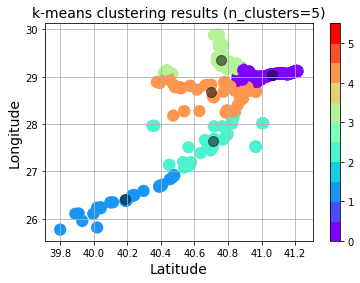

In [18]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
kmeans_1 = KMeans(n_clusters=5)
X = df4[['map_latitude','map_longitude']].values
predictions = kmeans_1.fit_predict(X)

clustered = pd.concat([df4.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,6,0.5), cmap.N)
plt.scatter(clustered['map_latitude'], clustered['map_longitude'], c=clustered['Cluster'],
            cmap=cmap, norm=norm, s=150, edgecolor='none')
plt.colorbar(ticks=np.linspace(0,9,10))
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5);
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('k-means clustering results (n_clusters=5)', fontsize=14)
plt.grid()
plt.show()



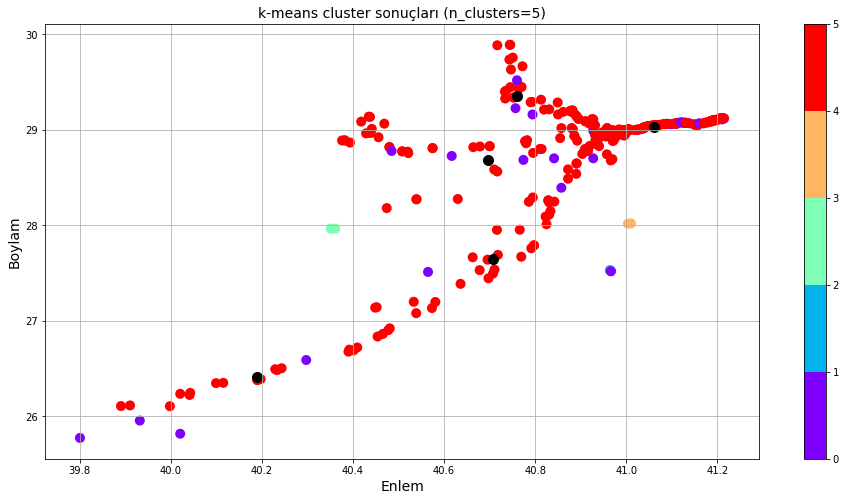

In [19]:
import hdbscan
rads = np.radians(X)
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='haversine')
predictions = clusterer.fit_predict(rads)
clustered = pd.concat([df4.reset_index(), 
                       pd.DataFrame({'Cluster':predictions})], 
                      axis=1)
clustered.drop('index', axis=1, inplace=True)
conditions = [
    
    clustered['Cluster'] == 0,
    clustered['Cluster'] == 1,
    clustered['Cluster'] == 2,
    clustered['Cluster'] == 3,
    clustered['Cluster'] == 4,
    ]
    
    

fig = plt.figure(figsize=(16,8))
cmap=plt.cm.rainbow
norm = matplotlib.colors.BoundaryNorm(np.arange(0,6,1), cmap.N)
plt.scatter(clustered['map_latitude'], clustered['map_longitude'], c=clustered['Cluster'],
            cmap=cmap, norm=norm, s=100, edgecolor='none')
plt.colorbar(ticks=np.linspace(0,9,10))
centers = kmeans_1.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1);

plt.xlabel('Enlem', fontsize=14)
plt.ylabel('Boylam', fontsize=14)
plt.title('k-means cluster sonuçları (n_clusters=5)', fontsize=14)
plt.grid()
plt.show()